In [12]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pickle

In [6]:
def plot_confusion_matrix(lbls, pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    ''' Función que dibuja una matriz de confusión '''
    cm = confusion_matrix(lbls, pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    classes = classes[unique_labels(lbls, pred)]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
     # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [30]:
def vect_heatmap(vector, **kwargs):
    ''' Función que representa un vector como mapa de calor '''
    # Creamos una imagen bidimensional apilando dos copias del vector
    img = np.vstack([vector, vector])
    # Y la dibujamos sin nada en el eje y
    plt.yticks([])
    plt.imshow(img, **kwargs)

# Modelo complejo

In [2]:
from utils_Tadpole import TadpoleSet, TadpoleModule
# Cargamos los datos y el modelo
with open('loaders', 'rb') as f:
    train_loader, val_loader, test_loader = pickle.load(f)
model = torch.load('model')

In [3]:
# Evaluamos las predicciones del modelo
preds = np.array([], dtype='int64')
lbls = np.array([], dtype='int64')
for data, target in test_loader:
    output = model(data)
    lbls = np.append(lbls, target.numpy())
    preds = np.append(preds, output.data.max(1, keepdim=True)[1].numpy().T[0])
len(preds), len(lbls)

(891, 891)

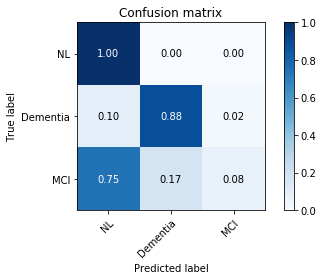

In [9]:
plot_confusion_matrix(lbls, preds, classes=test_loader.dataset.dataset.labnames,
    title='Confusion matrix', normalize=True)
# Grabar imagen
plt.savefig('figuras/confusion.png', figsize=(10, 5), dpi=150)

In [21]:
prednames = list(test_loader.dataset.dataset.prednames)
labnames = list(test_loader.dataset.dataset.labnames)

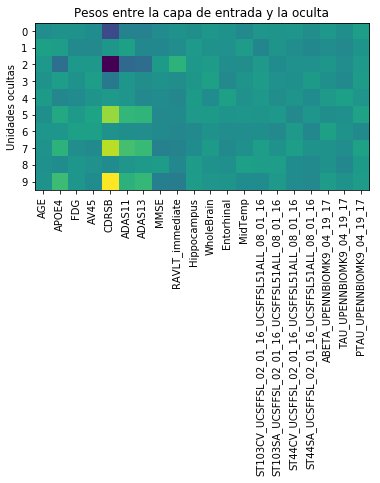

In [19]:
plt.title('Pesos entre la capa de entrada y la oculta')
plt.xticks(np.arange(len(prednames)), prednames, rotation='vertical')
plt.ylabel('Unidades ocultas')
plt.yticks(np.arange(10))
plt.imshow(model.l1.weight.detach())
plt.savefig('figuras/weights1.png', figsize=(10, 5), dpi=150)

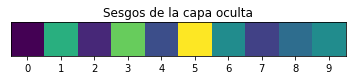

In [37]:
bias1 = model.l1.bias.detach()
plt.title('Sesgos de la capa oculta')
plt.xticks(np.arange(10))
opciones = {'aspect': 0.5}
vect_heatmap(bias1, **opciones)
plt.savefig('figuras/bias1.png', figsize=(10, 5), dpi=150)

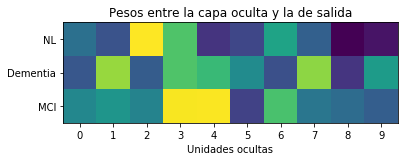

In [22]:
plt.title('Pesos entre la capa oculta y la de salida')
plt.xlabel('Unidades ocultas')
plt.xticks(np.arange(10))
plt.yticks(np.arange(len(labnames)), labnames)
plt.imshow(model.l2.weight.detach())
plt.savefig('figuras/weights2.png', figsize=(10, 5), dpi=150)

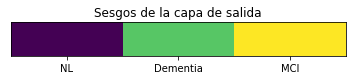

In [43]:
bias2 = model.l2.bias.detach()
plt.title('Sesgos de la capa de salida')
plt.xticks(np.arange(len(labnames)), labnames)
opciones['aspect'] = 0.15
vect_heatmap(bias2, **opciones)
plt.savefig('figuras/bias2.png', figsize=(10, 5), dpi=150)

# Modelo simple

In [27]:
# Cargamos otra vez los datos y el modelo simple
from utils_Tadpole import TadpoleSimple
with open('loaders', 'rb') as f:
    train_loader, val_loader, test_loader = pickle.load(f)
simple_model = torch.load('simple_model')

In [28]:
# Evaluamos las predicciones del modelo simple
preds_simple = np.array([], dtype='int64')
lbls_simple = np.array([], dtype='int64')
for data, target in test_loader:
    output = simple_model(data)
    lbls_simple = np.append(lbls_simple, target.numpy())
    preds_simple = np.append(preds_simple, output.data.max(1, keepdim=True)[1].numpy().T[0])
len(preds_simple), len(lbls_simple)

(891, 891)

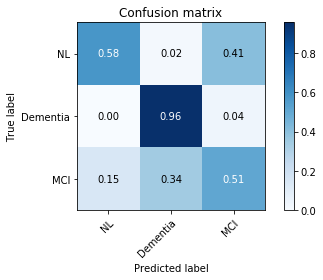

In [29]:
plot_confusion_matrix(lbls_simple, preds_simple, classes=test_loader.dataset.dataset.labnames,
    title='Confusion matrix', normalize=True)
# Grabar imagen
plt.savefig('figuras/confusion_simple.png', figsize=(10, 5), dpi=150)

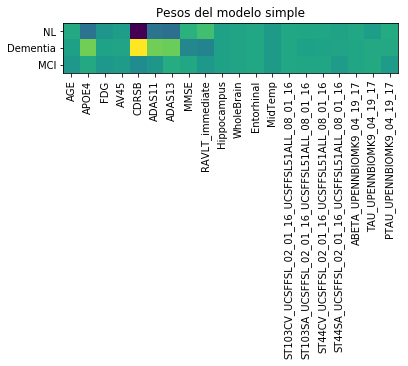

In [44]:
plt.title('Pesos del modelo simple')
plt.xticks(np.arange(len(prednames)), prednames, rotation='vertical')
plt.yticks(np.arange(len(labnames)), labnames)
plt.imshow(simple_model.layer.weight.detach())
plt.savefig('figuras/weights_simple.png', figsize=(10, 5), dpi=150)

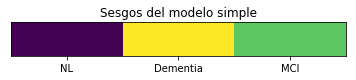

In [45]:
bias_simple= simple_model.layer.bias.detach()
plt.title('Sesgos del modelo simple')
plt.xticks(np.arange(len(labnames)), labnames)
opciones['aspect'] = 0.15
vect_heatmap(bias_simple, **opciones)
plt.savefig('figuras/bias_simple.png', figsize=(10, 5), dpi=150)